In [0]:
# call-in all the dependencies
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Dense, MaxPooling2D, UpSampling2D, Conv2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist

In [0]:
# lets get our data
(x_train , _), (x_test, _) = mnist.load_data()

# normalization
x_train = x_train/255.0
x_test = x_test/255.0

# reshaping into 2d vector
x_train = np.reshape(x_train , (len(x_train),28,28,1))
x_test = np.reshape(x_test , (len(x_test),28,28,1)) 

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
# lets make our model

input_img = Input(shape = (28,28,1))\

# Encoder layer
x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoder = MaxPooling2D((2,2), padding = 'same')(x)

# Decoder layer
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoder)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3,3), activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)
decoder = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

# finalising model architecture
autoencoder = Model(input_img , decoder)
autoencoder.compile(loss = 'binary_crossentropy', optimizer = "adadelta")

In [0]:
# lets train our model
autoencoder.fit(x_train, x_train,
                epochs = 50,
                batch_size = 256, # can also take 128
                shuffle = True,
                validation_data = (x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2586 - val_loss: 0.2000
Epoch 2/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1864 - val_loss: 0.1816
Epoch 3/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1679 - val_loss: 0.1632
Epoch 4/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1553 - val_loss: 0.1466
Epoch 5/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1471 - val_loss: 0.1409
Epoch 6/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1416 - val_loss: 0.1426
Epoch 7/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1378 - val_loss: 0.1349
Epoch 8/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1345 - val_loss: 0.1371
Epoch 9/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1323 - val_loss: 0.1305
Epoch

In [0]:
# get experience with the tensorboard
! tensorboard --logdir=/tmp/autoencoder

W1220 14:01:08.676446 Reloader plugin_event_accumulator.py:286] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1220 14:01:08.676445 140435740092160 plugin_event_accumulator.py:286] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1220 14:01:08.678702 Reloader plugin_event_accumulator.py:294] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W1220 14:01:08.678702 140435740092160 plugin_event_accumulator.py:294] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W1220 14:01:08.699223 Reloader plugin_event_accumulator.py:286] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Over

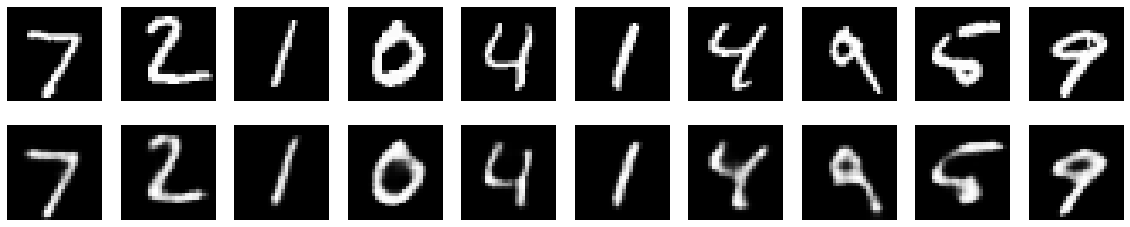

In [0]:
# lets visualize the results
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
# so now as we can see that the loss is less and the accuracy of the generated images also improved
# lets now dive into the application of autoencoders...